# Trying to grok correlation

connection between correlation, linear regression, and generated random variables

In [2]:
import matplotlib.pyplot as plt
#import sksurv.datasets
import sklearn
import pandas as pd
import random
import numpy as np

from sklearn.linear_model import LinearRegression



In [ ]:
bin = np.random.randint(2, size = 1000, dtype = int)
p = 0.5
bin2 = np.random.choice([0,1], size = 1000, p = [1-p,p] )

#create a correlated varaible - the probability of bin3 = 1 is higher if bin2 is 1
prob = [0.5,0.5]
bin3 = np.array([np.random.choice([0,1],p = [1-prob[i],prob[i]]) for i in bin2])

(100,)
[0.00430884]


array([[1.        , 0.00430947],
       [0.00430947, 1.        ]])

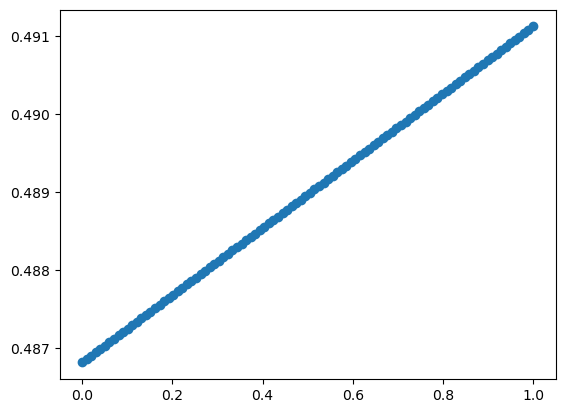

In [5]:
linreg = LinearRegression()
linreg.fit(bin2.reshape(-1,1),bin3)

x_ = np.linspace(0,1,100)
print(x_.shape)
y_ = linreg.predict(x_.reshape(-1,1))
plt.scatter(x_,y_)

print(linreg.coef_)
#gradient of the line is essentially 0
np.corrcoef(bin2,bin3)

In [6]:
#repeat again
prob2 = [0.5,0.7]
bin4 = np.array([np.random.choice([0,1],p = [1-prob2[i],prob2[i]]) for i in bin2])

# rise/run = 0.2/1 = 0.2 correlation
np.corrcoef(bin2,bin4)

array([[1.        , 0.19476819],
       [0.19476819, 1.        ]])

# calculating it out by hand

In [13]:
np.mean((bin2 - np.mean(bin2))*(bin4  -np.mean(bin4)))/(np.std(bin2)*np.std(bin4))

0.19476818692353684